In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os as os

In [30]:
df.columns

Index(['id', 'listing_url', 'scrape_id', 'last_scraped', 'source', 'name',
       'description', 'neighborhood_overview', 'picture_url', 'host_id',
       'host_url', 'host_name', 'host_since', 'host_location', 'host_about',
       'host_response_time', 'host_response_rate', 'host_acceptance_rate',
       'host_is_superhost', 'host_thumbnail_url', 'host_picture_url',
       'host_neighbourhood', 'host_listings_count',
       'host_total_listings_count', 'host_verifications',
       'host_has_profile_pic', 'host_identity_verified', 'neighbourhood',
       'neighbourhood_cleansed', 'neighbourhood_group_cleansed', 'latitude',
       'longitude', 'property_type', 'room_type', 'accommodates', 'bathrooms',
       'bathrooms_text', 'bedrooms', 'beds', 'amenities', 'price',
       'minimum_nights', 'maximum_nights', 'minimum_minimum_nights',
       'maximum_minimum_nights', 'minimum_maximum_nights',
       'maximum_maximum_nights', 'minimum_nights_avg_ntm',
       'maximum_nights_avg_ntm', 'ca

In [7]:
#Crear la tabla 
tabla1 = pd.read_csv("Listings_buena.csv")

In [9]:
df = tabla1

In [33]:
#Transformacion de price
price = df["price"]
print(price)

0        176.0
1         74.0
2        257.0
4        249.0
5        240.0
         ...  
18920     86.0
18921    167.0
18922    165.0
18923     44.0
18924     95.0
Name: price, Length: 15189, dtype: float64


In [13]:
df['price'] = df['price'].replace({r'\$': '', ',': ''}, regex=True).astype(float)

In [17]:
df["price"] = df["price"].round(0)

In [31]:
df["price"].isnull().sum()

0

In [29]:
df = df.dropna(subset=["price"])

In [ ]:
#Limpieza de Bedrooms 

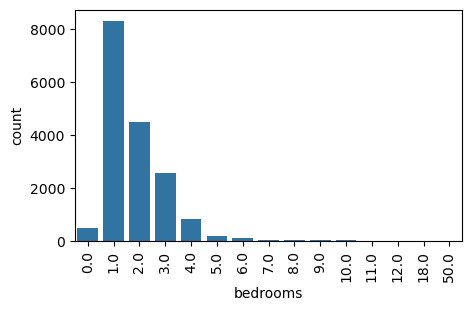

In [46]:
plt.figure(figsize = (5,3))
sns.countplot(data = tabla1, x = "bedrooms")
plt.xticks(rotation = 90)
plt.show()

In [35]:
# Convertir los valores mayores a 12 en NaN
df.loc[df['bedrooms'] > 12, 'bedrooms'] = np.nan

In [62]:
df['bedrooms'].isnull().sum()

0

In [49]:
#Crear matriz de correlacion entre bedrooms i price 
df_subset = df[['price', 'bedrooms']]

<Axes: >

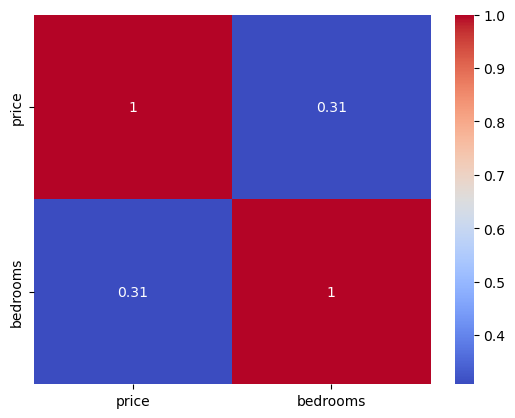

In [54]:
sns.heatmap(
    df_subset.corr(),
    annot = True,
    cmap = "coolwarm"
)

In [60]:
#Demasiado baja la relacion entre bedrooms y price como para hacer una regresion lineal,
#asi que sustituyo valores nulos por la media 
# Calcular la media de la columna 'bedrooms'
mean_value = df['bedrooms'].mean()

# Sustituir los valores nulos por la media
df['bedrooms'] = df['bedrooms'].fillna(mean_value)

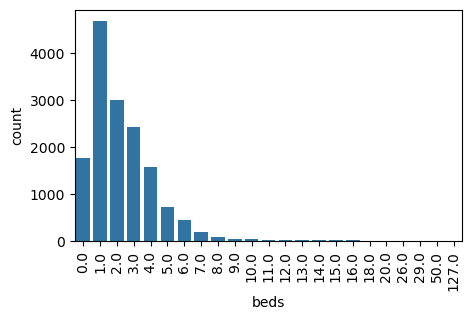

In [64]:
#Limpieza de la columna beds
plt.figure(figsize = (5,3))
sns.countplot(data = tabla1, x = "beds")
plt.xticks(rotation = 90)
plt.show()

In [85]:
df['beds'].isnull().sum()

0

In [72]:
#Crear matriz de correlacion entre bedrooms i price 
df_subset1 = df[['price', 'beds']]

<Axes: >

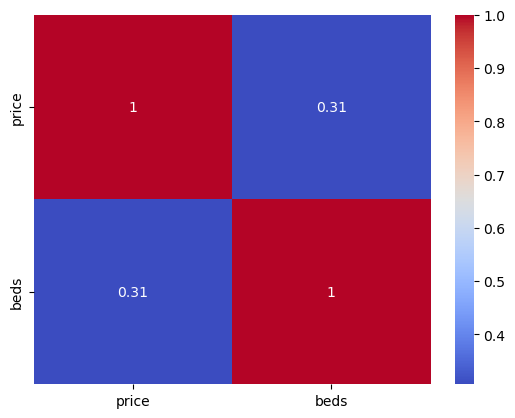

In [74]:
sns.heatmap(
    df_subset1.corr(),
    annot = True,
    cmap = "coolwarm"
)

In [76]:
# Convertir los valores mayores a 20 en NaN
df.loc[df['bedrooms'] > 20, 'bedrooms'] = np.nan

In [83]:
# Calcular la media de la columna 'beds'
mean_value1 = df['beds'].mean()

# Sustituir los valores nulos por la media
df['beds'] = df['beds'].fillna(mean_value1)

In [123]:
df['minimum_nights'].isnull().sum()

0

In [135]:
df['maximum_nights'].isnull().sum()

0

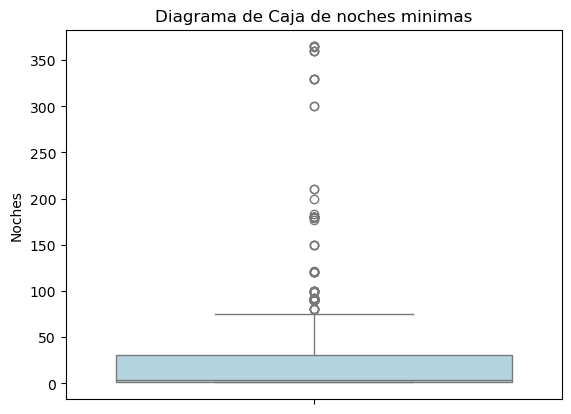

In [115]:
sns.boxplot(y=df['minimum_nights'], color='lightblue')

# Añadir etiquetas y título
plt.ylabel('Noches')
plt.title('Diagrama de Caja de noches minimas')

# Mostrar la gráfica
plt.show()

In [97]:
# Convertir los valores mayores a 400 en NaN
df.loc[df['minimum_nights'] > 400, 'minimum_nights'] = np.nan

In [121]:
# Calcular la mediana de la columna 'minimum_nights'
median_value = df['minimum_nights'].median()
#Sustituir nulos por la mediana
df['minimum_nights'] = df['minimum_nights'].fillna(median_value)

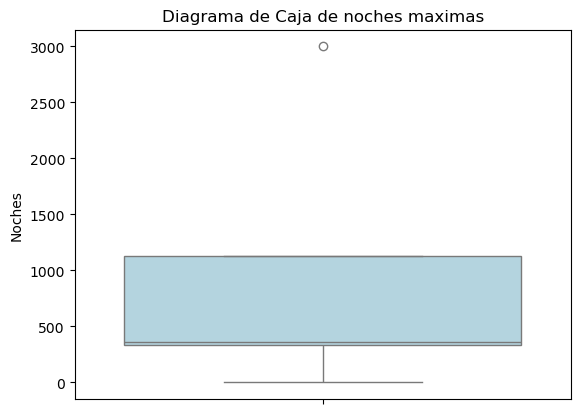

In [127]:
sns.boxplot(y=df['maximum_nights'], color='lightblue')

# Añadir etiquetas y título
plt.ylabel('Noches')
plt.title('Diagrama de Caja de noches maximas')

# Mostrar la gráfica
plt.show()

In [129]:
# Convertir los valores mayores a 400 en NaN
df.loc[df['maximum_nights'] > 1500, 'maximum_nights'] = np.nan

In [133]:
# Calcular la mediana de la columna 'maximum_nights'
median_value = df['maximum_nights'].median()
#Sustituir nulos por la mediana
df['maximum_nights'] = df['maximum_nights'].fillna(median_value)